In [29]:
import pandas as pd

full_data = pd.read_excel('Clean_dataset/new_complete_data.xlsx')
full_data = full_data[full_data['Caller_Company'] =='Zong'] 

In [30]:
from sklearn.preprocessing import LabelEncoder

#full_data["Call_Company"] = pd.factorize(full_data["Call_Company"])[0]
number = LabelEncoder()
full_data['Caller_Company'] = number.fit_transform(full_data['Caller_Company'].astype('str'))

#df1["Caller_Number"] = pd.factorize(full_data["Caller_Number"])[0]
full_data['Caller_Number'] = number.fit_transform(full_data['Caller_Number'].astype('str'))


full_data['Dialled_Company'] = number.fit_transform(full_data['Dialled_Company'].astype('str'))
#full_data["Calltype"] = pd.factorize(full_data["Calltype"])[0]
full_data['Calltype'] = number.fit_transform(full_data['Calltype'].astype('str'))

#full_data["Dialled_Number"] = pd.factorize(full_data["Dialled_Number"])[0]#
full_data['Dialled_Number'] = number.fit_transform(full_data['Dialled_Number'].astype('str'))


In [31]:
from sklearn.model_selection import train_test_split
X= full_data.drop(['Duration','Monetory_Rates'], axis= 1)
X_train,X_test,Y_train,Y_test = train_test_split(X, full_data.Duration,test_size = 0.33, random_state=5)


In [32]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)


print X_train.columns
print(clf.coef_)

print(clf.intercept_)


Index([u'Caller_Number', u'Caller_Company', u'Dialled_Number',
       u'Dialled_Company', u'Calltype', u'Month', u'Day', u'Hours'],
      dtype='object')
[ -1.01938016e+00   0.00000000e+00   3.62039379e-03   1.95958402e+01
   1.88497589e+00  -3.34429829e+00   1.52368896e-01   1.31176557e+00]
87.9376677167


In [33]:
pred_train = clf.predict(X_train)

In [34]:
clf.score(X_train,Y_train)

0.0077520776502028052

In [35]:
pred_test = clf.predict(X_test)

In [36]:
clf.score(X_test,Y_test)

0.0083480581325784398

In [37]:
import numpy as np
np.mean((Y_train - clf.predict(X_train)) ** 2)

52751.13576265967

In [38]:
np.mean((Y_test - clf.predict(X_test)) ** 2)

58484.78917644769

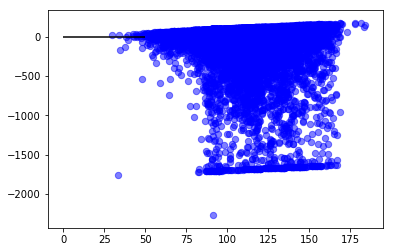

In [39]:
import matplotlib.pyplot as plt
plt.scatter(clf.predict(X_train),clf.predict(X_train)-Y_train,c='b',s=40, alpha=0.5)
plt.scatter(clf.predict(X_test),clf.predict(X_test)-Y_test,c='b',s=40, alpha=0.5)
plt.hlines(y=0,xmin=0, xmax= 50)
plt.show()

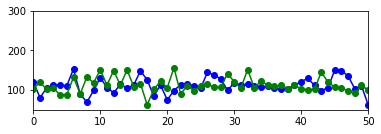

In [40]:
import matplotlib.pyplot as plt

fig= plt.figure()

#fig.subplots_adjust(bottom=0.2)

ax1 = fig.add_subplot(211)

line1=ax1.plot(pred_train,'bo-',label='train')
line2=ax1.plot(pred_test,'go-',label='test')

ax1.set_ylim(50,300)
ax1.set_xlim(0,50)

plt.show()